Code to generate histogram of all RULA scores

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [74]:
os.chdir(r"C:\Users\anand\Desktop\RULA Labelled Data")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f,header=None) for f in all_filenames], axis=0)

l_rula_scores = combined_csv.iloc[:,58].values
r_rula_scores = combined_csv.iloc[:,59].values
# l_rula_scores = l_rula_scores[~np.isnan(l_rula_scores)]
# r_rula_scores = r_rula_scores[~np.isnan(r_rula_scores)]

# l_rula_scores = l_rula_scores.astype(int)
# r_rula_scores = r_rula_scores.astype(int)


### Plot section

Text(0.5, 0.98, 'RULA Score Distribution for Left and Right Hand')

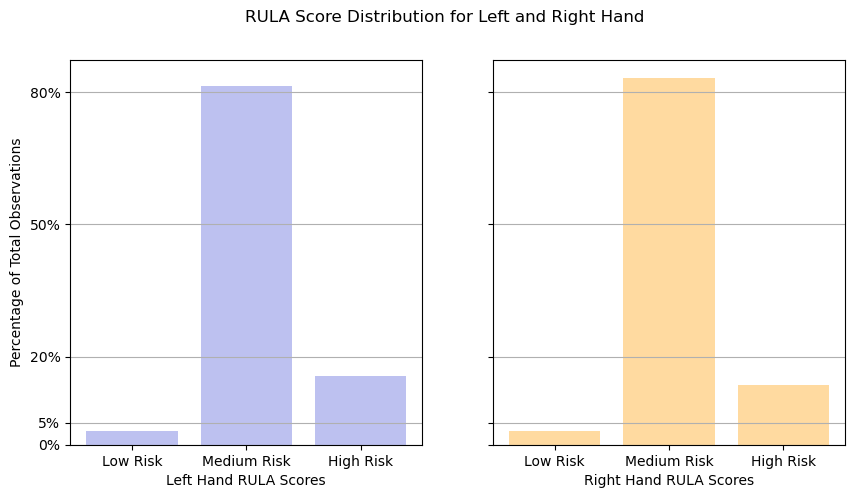

In [75]:
# 0-3 is low, 4,5 is medium, 6-7 is high

l_low = np.sum(l_rula_scores <= 3)/len(l_rula_scores)
l_med = np.sum((l_rula_scores == 4) | (l_rula_scores == 5))/len(l_rula_scores)
l_high = np.sum(l_rula_scores >= 6)/len(l_rula_scores)

r_low = np.sum(r_rula_scores <= 3)/len(r_rula_scores)
r_med = np.sum((r_rula_scores == 4) | (r_rula_scores == 5))/len(r_rula_scores)
r_high = np.sum(r_rula_scores >= 6)/len(r_rula_scores)

l_rula = [l_low, l_med, l_high]
r_rula = [r_low, r_med, r_high]

# fig, ax = plt.subplots()
bar_width = 1
index = np.arange(3)

# Plot both hand RULA scores

# plot left RULA scores with no gap between bars

# plt.subplot(1,2,1)
# rects1 = plt.bar(index, l_rula, bar_width, color = '#bdc1f0', label = 'Left RULA')
# plt.xticks(index, ('Low Risk', 'Medium Risk', 'High Risk'))
# plt.yticks([0,10000,50000,100000])
# plt.xlabel('Left Hand RULA Scores')
# plt.ylabel('Count')
# plt.grid(axis = 'y')
# plt.tight_layout()

# # plot right RULA scores with no gap between bars

# plt.subplot(1,2,2)
# rects2 = plt.bar(index, r_rula, bar_width, color = '#f0bdc1', label = 'Right RULA')
# plt.xticks(index, ('Low Risk', 'Medium Risk', 'High Risk'))
# plt.yticks([0,10000,50000,100000])
# plt.xlabel('Right Hand RULA Scores')
# plt.ylabel('Count')
# plt.grid(axis = 'y')
# plt.tight_layout()

# Plot both hand RULA scores in subplots

fig, ax = plt.subplots(1,2, figsize = (10,5), sharey = True)
bar_width = 0.8
index = np.arange(3)

# plot left RULA scores with gap between bars
ax[0].bar(index, l_rula, bar_width, color = '#bdc1f0', label = 'Left RULA')
ax[0].set_xticks(index)
ax[0].set_xticklabels(('Low Risk', 'Medium Risk', 'High Risk'))
ax[0].set_yticks([0,0.05,0.2,0.5,0.8])
y_vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in y_vals])
# In percentage

ax[0].set_xlabel('Left Hand RULA Scores')
ax[0].set_ylabel('Percentage of Total Observations')
ax[0].grid(axis = 'y')
# ax[0].set_title('Left Hand RULA Scores')

# plot right RULA scores with gap between bars
ax[1].bar(index, r_rula, bar_width, color = '#ffdaa0', label = 'Right RULA')
ax[1].set_xticks(index)
ax[1].set_xticklabels(('Low Risk', 'Medium Risk', 'High Risk'))
# ax[1].set_yticks([0,10000,50000,100000])
ax[1].set_xlabel('Right Hand RULA Scores')
ax[1].grid(axis = 'y')
# ax[1].set_title('Right Hand RULA Scores')

fig.suptitle('RULA Score Distribution for Left and Right Hand')
# plt.tight_layout()


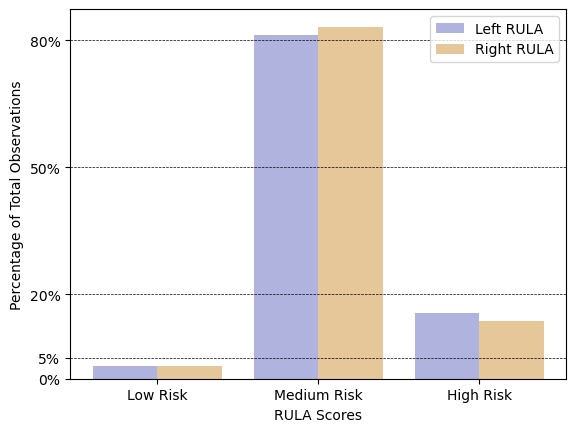

In [89]:
# Plot both hand HAL scores in same plot

bar_width = 0.4

plt.bar(index, l_rula, bar_width, color = '#afb3de', label = 'Left RULA')

plt.bar(index + bar_width, r_rula, bar_width, color = '#e6c79a',label = 'Right RULA')

plt.xticks(index + bar_width/2, ('Low Risk', 'Medium Risk', 'High Risk'))
plt.yticks([0,0.05,0.2,0.5,0.8])
y_vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in y_vals])
plt.xlabel('RULA Scores')
plt.ylabel('Percentage of Total Observations')
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
# plt.title('RULA Score Distribution for Left and Right Hand')
plt.savefig(r'C:\Users\anand\Desktop\ergo paper figures\RULA_Score_Distribution.svg', format = 'svg', dpi = 1200)